# Next Word Prediction
It's a task of predicting what word comes next after given text.

Here I have used NLP technique to make a prediction using Bidirectional LSTM (Long Short Term Memory) model

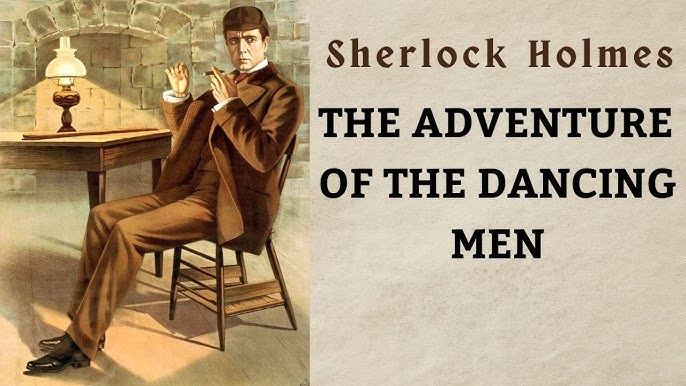

Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token = '<unknown>')
from tensorflow.keras.utils import pad_sequences, to_categorical

from keras.models import Sequential
from keras.layers import Dense, Bidirectional, LSTM, Embedding

In [3]:
# Read dataset

with open('/content/drive/MyDrive/Dataset - Advance AI /NLP/adventure of dancing men.txt', 'r', encoding='utf-8') as file:
  text = file.read()

print(text[:500])





                        THE ADVENTURE OF THE DANCING MEN

                               Arthur Conan Doyle



     Holmes had been seated for some hours in silence with his long, thin
     back curved over a chemical vessel in which he was brewing a
     particularly malodorous product. His head was sunk upon his breast,
     and he looked from my point of view like a strange, lank bird, with
     dull grey plumage and a black top-knot.

     "So, Watson," said he, suddenly, "you do not pro


### Tokenization
Process in which we provide an unique ID to all the words and make a vocabulary


In [4]:
tokenizer.fit_on_texts([text])

In [12]:
vocab = len(tokenizer.word_index) + 1
print(f'There are {vocab} unique words.')

There are 1921 unique words.


In [5]:
# Convert to sequence

text_seq = []

for line in text.split('\n'):
  sent_token = tokenizer.texts_to_sequences([line])[0]

  for i in range(1, len(sent_token)):
    text_seq.append(sent_token[:i+1])

text_seq[:5]

[[2, 546],
 [2, 546, 7],
 [2, 546, 7, 2],
 [2, 546, 7, 2, 60],
 [2, 546, 7, 2, 60, 76]]

In [6]:
# Decode Review

sample_review = text_seq[4]

reverse_word_index = {value:key for key, value in tokenizer.word_index.items()}
decode = ' '.join([reverse_word_index.get(i) for i in sample_review])

print(f'Encoded Review:- {sample_review}')
print('-'*50)
print(f'Decoded Review:- {decode}')

Encoded Review:- [2, 546, 7, 2, 60, 76]
--------------------------------------------------
Decoded Review:- the adventure of the dancing men


### Padding
Process make each sentence equal length

First we need to find sentence with maximum length and based on that sentence we have to pad the rest sentences.

In [7]:
max_len = max([len(x) for x in text_seq])
print(max_len)

text_pad = pad_sequences(text_seq, maxlen=max_len, padding='pre')
pd.DataFrame(text_pad)

17


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,546
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,546,7
2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,546,7,2
3,0,0,0,0,0,0,0,0,0,0,0,0,2,546,7,2,60
4,0,0,0,0,0,0,0,0,0,0,0,2,546,7,2,60,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9027,0,0,0,0,0,0,0,0,0,0,0,0,26,306,713,36,2
9028,0,0,0,0,0,0,0,0,0,0,0,26,306,713,36,2,1919
9029,0,0,0,0,0,0,0,0,0,0,26,306,713,36,2,1919,1920
9030,0,0,0,0,0,0,0,0,0,26,306,713,36,2,1919,1920,583


### Prepare data for model building
we consider last element of all sequences as a label and rest are our features

In [8]:
x = text_pad[:,:-1]
y = text_pad[:,-1]

In [9]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,546
2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,546,7
3,0,0,0,0,0,0,0,0,0,0,0,0,2,546,7,2
4,0,0,0,0,0,0,0,0,0,0,0,2,546,7,2,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9027,0,0,0,0,0,0,0,0,0,0,0,0,26,306,713,36
9028,0,0,0,0,0,0,0,0,0,0,0,26,306,713,36,2
9029,0,0,0,0,0,0,0,0,0,0,26,306,713,36,2,1919
9030,0,0,0,0,0,0,0,0,0,26,306,713,36,2,1919,1920


In [9]:
pd.DataFrame(y)

,0
0,546
1,7
2,2
3,60
4,76
...,...
9027,2
9028,1919
9029,1920
9030,583


In [10]:
print(x.shape)
print(y.shape)

(9032, 16)
(9032,)


In [13]:
# Convert labels to categorical

y = to_categorical(y, num_classes=vocab)
pd.DataFrame(y)

,0,1,2,3,4,5,6,7,8,9,...,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9027,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Model Building

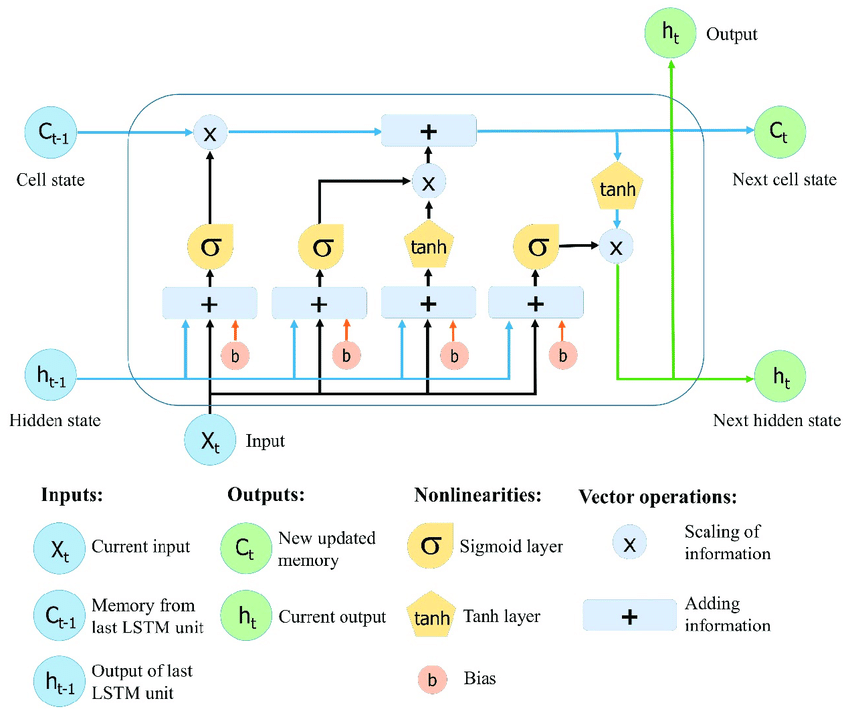

In [15]:
model = Sequential()

# Embedding Layer
model.add(Embedding(input_dim=vocab, output_dim=128, input_length=max_len))

# LSTM Layer
model.add(Bidirectional(LSTM(150)))

# Dense Layer
model.add(Dense(vocab, activation='softmax'))

# Model Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Fit
model.fit(x, y, epochs=50)

Epoch 1/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0436 - loss: 6.5582
Epoch 2/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0600 - loss: 5.8564
Epoch 3/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0712 - loss: 5.5965
Epoch 4/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0906 - loss: 5.2919
Epoch 5/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1100 - loss: 4.9660
Epoch 6/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1373 - loss: 4.6453
Epoch 7/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1589 - loss: 4.3356
Epoch 8/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1751 - loss: 4.0840
Epoch 9/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2090 - loss: 3.8028
Epoch 10/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2390 - loss: 3.5603
Epoch 11/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2947 - loss: 3.3212
Epoch 12/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/st

Prediction

In [16]:
# Predict the next 10 words after given text

text = "He took from his pocket the"
next_words = 10

for i in range(next_words):
  # Tokenize
  text_token = tokenizer.texts_to_sequences([text])[0]

  # Padding
  text_pad = pad_sequences([text_token], maxlen=max_len, padding='pre')

  # Predict
  position = np.argmax(model.predict(text_pad, verbose=0))

  for word, index in tokenizer.word_index.items():
    if index == position:
      text = text + ' ' + word
print(text)

He took from his pocket the various slips of the dancing men with which i cried


In [17]:
model.save('Next_word.h5')